In [1]:
!pip install kaggle


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [5]:
import os
import shutil

# Replace with the path to where your kaggle.json is downloaded
source = os.path.expanduser("~/Desktop/kaggle.json")
destination = os.path.expanduser("~/.kaggle/kaggle.json")

# Create the .kaggle directory if it doesn't exist
os.makedirs(os.path.dirname(destination), exist_ok=True)

# Move the file
shutil.move(source, destination)

# Set proper file permissions
os.chmod(destination, 0o600)

print("kaggle.json moved and permissions set successfully.")


kaggle.json moved and permissions set successfully.


In [7]:
!kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression

Dataset URL: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
License(s): CC0-1.0
  0%|                                                 | 0.00/457 [00:00<?, ?B/s]
100%|██████████████████████████████████████████| 457/457 [00:00<00:00, 1.12MB/s]


In [9]:
import zipfile

with zipfile.ZipFile("salary-dataset-simple-linear-regression.zip","r") as zip_ref:
    zip_ref.extractall("Salary")

In [11]:
print(os.listdir("Salary"))

['Salary_dataset.csv']


In [13]:
import pandas as pd

df=pd.read_csv("Salary/Salary_dataset.csv") #load data
df.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


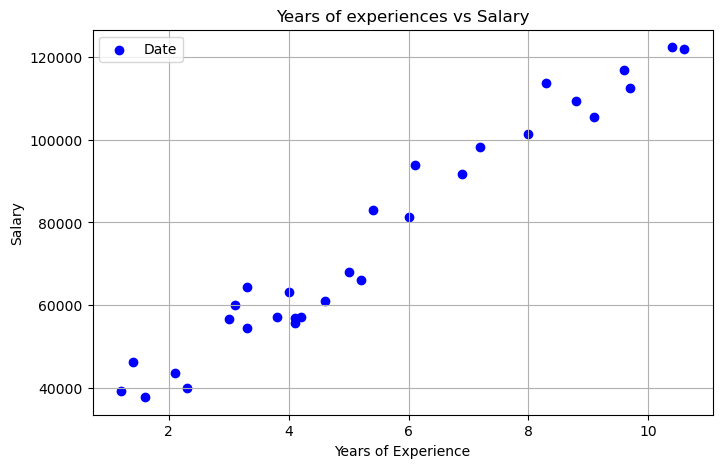

In [15]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,5))

plt.scatter(df['YearsExperience'],df['Salary'],color='blue',label='Date')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of experiences vs Salary')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [77]:
df = df.drop(columns=['Unnamed: 0'])


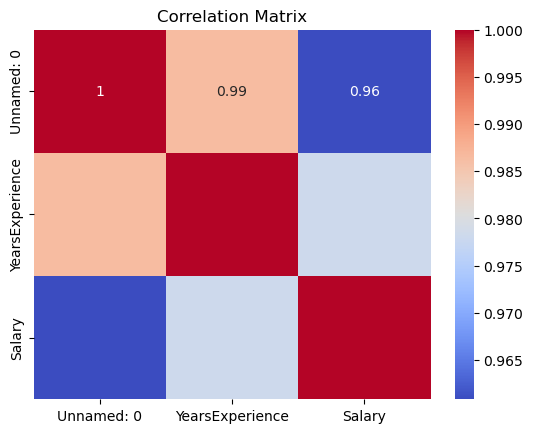

In [19]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Slope (coefficient): 9423.815323030976
Intercept: 24380.201479473704
R² Score: 0.9024461774180497
Root Mean Squared Error (RMSE): 7059.04362190151


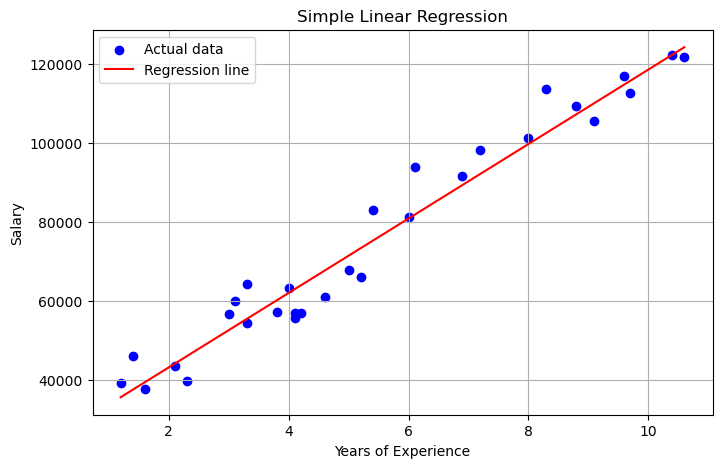

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

results = []
results.append({'RegressionType': 'Linear', 'R2Score': r2})

print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

Slope (coefficient): 9376.749489639846
Intercept: 24629.062073529312
R² Score: 0.9021627846740264
Root Mean Squared Error (RMSE): 7069.289407005236


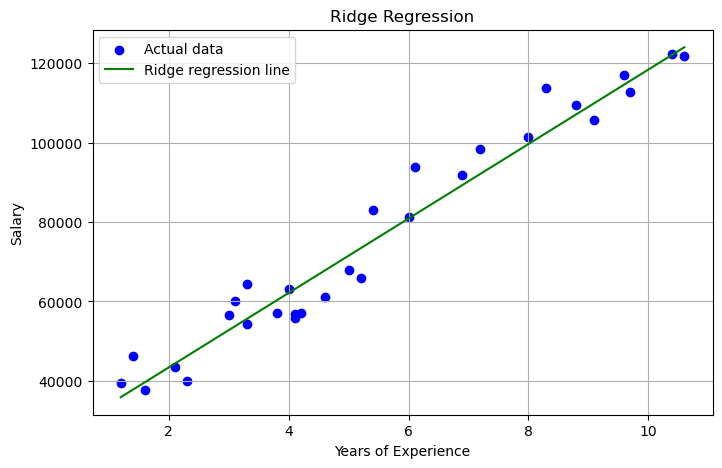

In [23]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

results.append({'RegressionType': 'Ridge', 'R2Score': r2})

print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='green', label='Ridge regression line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

Coefficients: [   0.         8481.84129267   80.62084747]
Intercept: 26437.678011934826
R² Score: 0.8971645780890871
Root Mean Squared Error (RMSE): 7247.614529538317


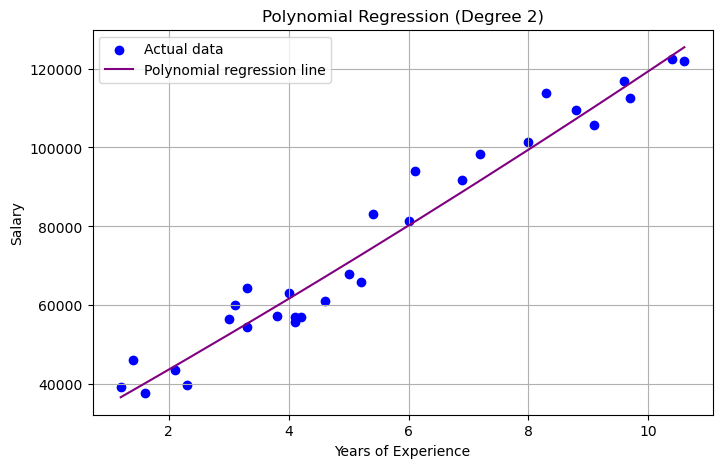

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

results.append({'RegressionType': 'Polynomial_2', 'R2Score': r2})

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(poly.transform(X)), color='purple', label='Polynomial regression line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()

Coefficients: [    0.         -1545.68533541  2130.08472377  -118.35909288]
Intercept: 39318.458515822145
R² Score: 0.9048429887854859
Root Mean Squared Error (RMSE): 6971.787097429725


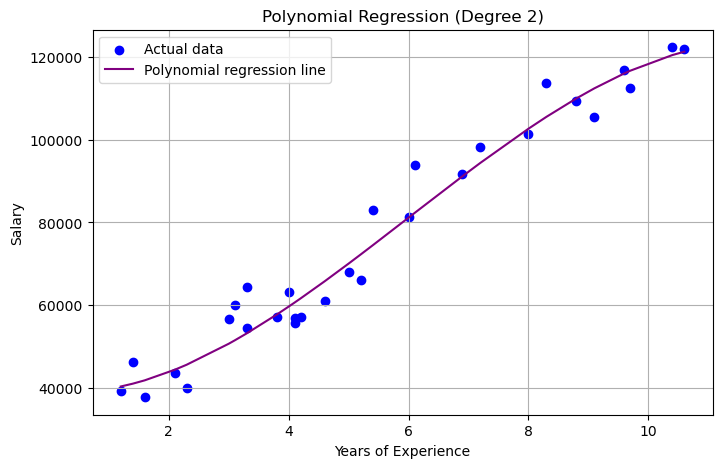

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

results.append({'RegressionType': 'Polynomial_2', 'R2Score': r2})

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(poly.transform(X)), color='purple', label='Polynomial regression line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()

Coefficients: [    0.         -7823.57096999  4220.84639397  -384.15341638
    11.34499537]
Intercept: 45048.127879623295
R² Score: 0.9029791879054079
Root Mean Squared Error (RMSE): 7039.732754947338


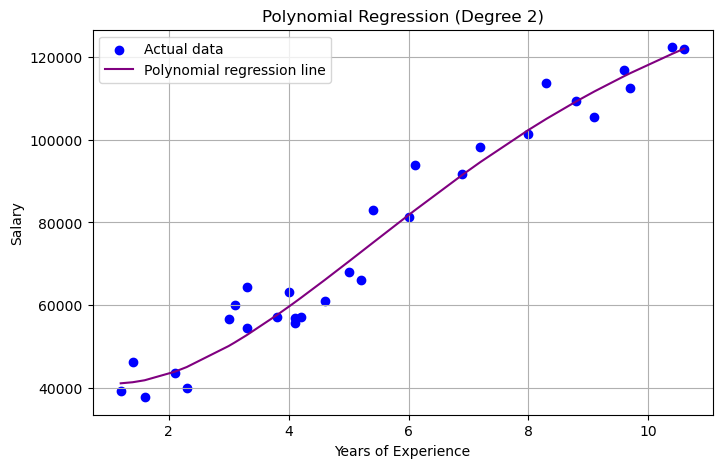

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

results.append({'RegressionType': 'Polynomial_2', 'R2Score': r2})

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(poly.transform(X)), color='purple', label='Polynomial regression line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()

R² Score: 0.9637312725898256
Root Mean Squared Error (RMSE): 5133.147541956999


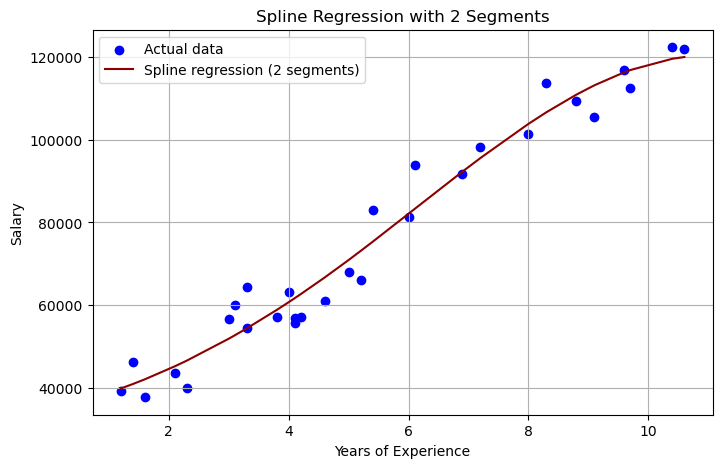

In [33]:
from scipy.interpolate import LSQUnivariateSpline

X_array = X.values.flatten()
knot = [np.median(X_array)]

model = LSQUnivariateSpline(X_array, y, t=knot)

y_pred = model(X_array)

r2 = r2_score(y, y_pred)

results.append({'RegressionType': 'Spline_2Segments', 'R2Score': r2})

print("R² Score:", r2)
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_array, y_pred, color='darkred', label='Spline regression (2 segments)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Spline Regression with 2 Segments')
plt.legend()
plt.grid(True)
plt.show()

R² Score: 0.9669403237976544
Root Mean Squared Error (RMSE): 4900.798950594401


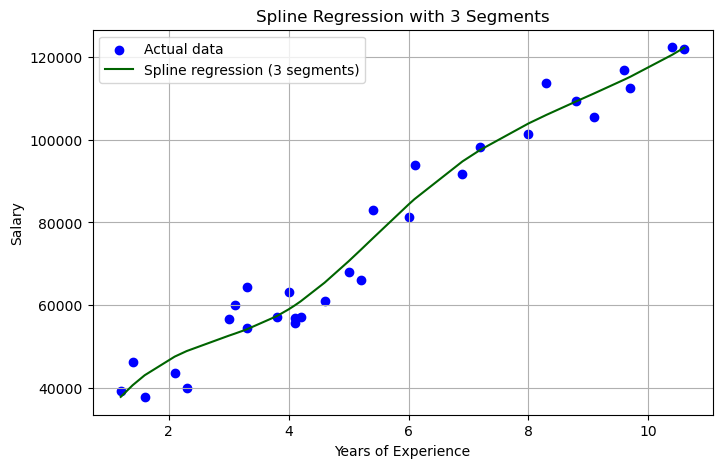

In [35]:
X_array = X.values.flatten()
knots = np.quantile(X_array, [1/3, 2/3])

model = LSQUnivariateSpline(X_array, y, t=knots)

y_pred = model(X_array)

r2 = r2_score(y, y_pred)

results.append({'RegressionType': 'Spline_3Segments', 'R2Score': r2})

print("R² Score:", r2)
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_array, y_pred, color='darkgreen', label='Spline regression (3 segments)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Spline Regression with 3 Segments')
plt.legend()
plt.grid(True)
plt.show()

R² Score: 0.9781392901830511
Root Mean Squared Error (RMSE): 3985.1962991777414


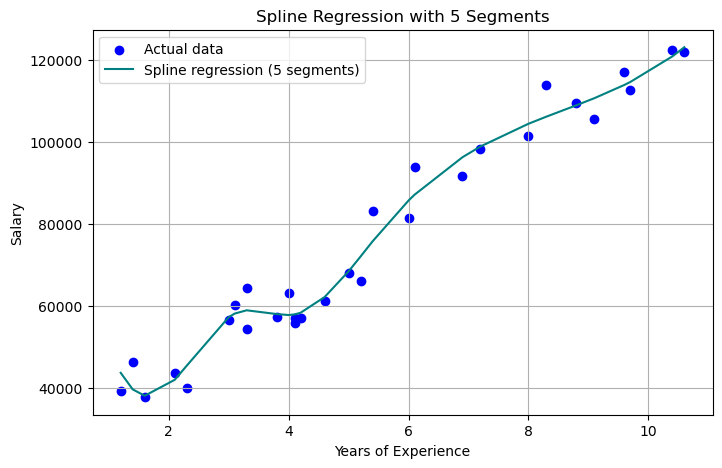

In [37]:
X_array = X.values.flatten()
knots = np.quantile(X_array, [1/5, 2/5, 3/5, 4/5])

model = LSQUnivariateSpline(X_array, y, t=knots)

y_pred = model(X_array)

r2 = r2_score(y, y_pred)

results.append({'RegressionType': 'Spline_5Segments', 'R2Score': r2})

print("R² Score:", r2)
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y, y_pred)))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_array, y_pred, color='teal', label='Spline regression (5 segments)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Spline Regression with 5 Segments')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
df_results = pd.DataFrame(results)
df_sorted = df_results.sort_values(by='R2Score', ascending=False)
print(df_sorted)

     RegressionType   R2Score
8  Spline_5Segments  0.978139
7  Spline_3Segments  0.966940
5  Spline_2Segments  0.963731
6  Spline_2Segments  0.963731
3      Polynomial_2  0.904843
4      Polynomial_2  0.902979
0            Linear  0.902446
1             Ridge  0.902163
2      Polynomial_2  0.897165
